## Практическое занятие "Линейные модели. Простая регрессия".

Цель состоит в том, чтобы построить модель, которая прогнозирует продажи на основе затрат на рекламу на различных платформах, таких как телевидение, радио и газеты.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# чтение данных
data = pd.read_csv("advertising.csv")

### 1.Проверить данные на наличие пропущенных значений.

In [3]:
# your code here
# Проверка на наличие пропущенных значений
missing_values = data.isnull().sum()

# Вывод результатов
print("Пропущенные значения в данных:")
print(missing_values[missing_values > 0])

Пропущенные значения в данных:
Series([], dtype: int64)


### 2.Проверить данные на наличие дубликатов.

In [4]:
# your code here
# Проверка на наличие дубликатов
duplicates = data.duplicated().sum()

# Вывод результатов
if duplicates > 0:
    print(f"Найдено {duplicates} дубликатов в данных.")
else:
    print("Дубликатов в данных не найдено.")


Дубликатов в данных не найдено.


### 3.Проверить данные на наличие выбросов.

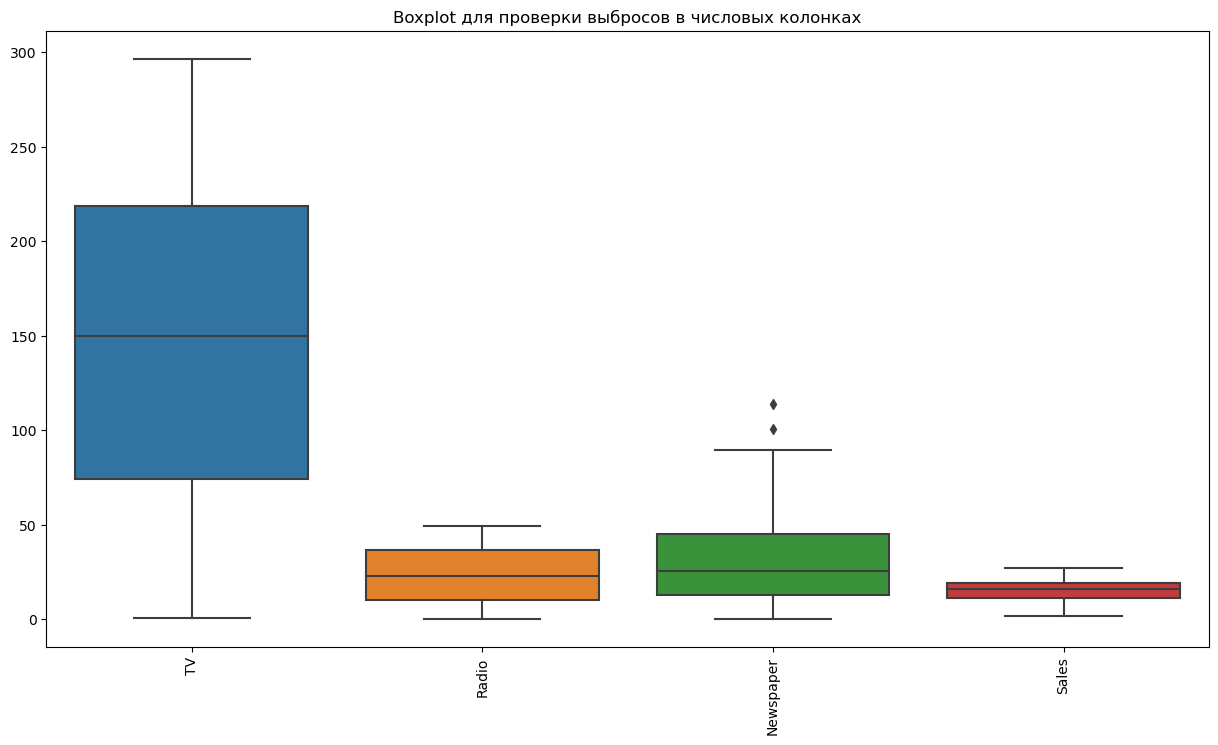

In [5]:
# your code here
# Построение boxplot для всех числовых колонок
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.title("Boxplot для проверки выбросов в числовых колонках")
plt.show()

### 4.Провести разведочный анализ данных. Определить, как продажи связаны с другими признаками.

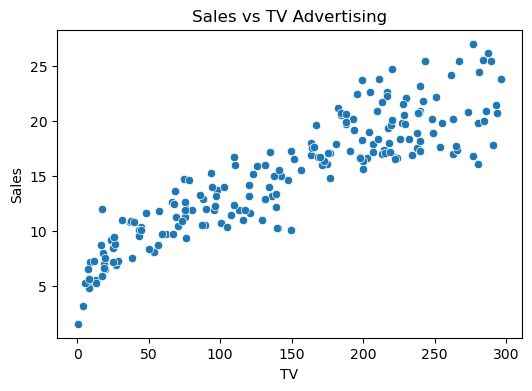

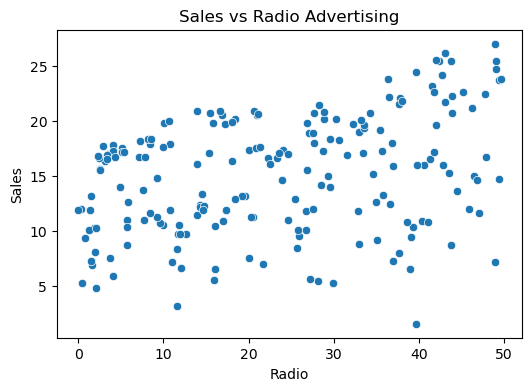

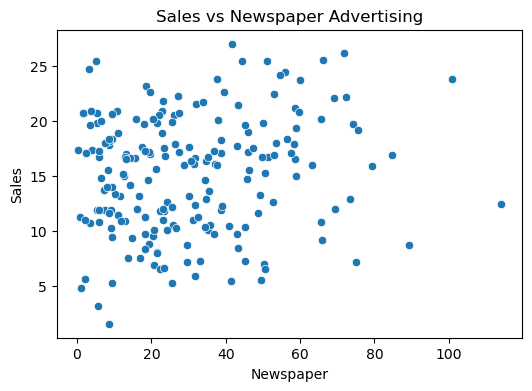

In [6]:
# your code here
# Продажи vs Телевидение
plt.figure(figsize=(6, 4))
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('Sales vs TV Advertising')
plt.show()

# Продажи vs Радио
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Radio', y='Sales', data=data)
plt.title('Sales vs Radio Advertising')
plt.show()

# Продажи vs Газеты
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Newspaper', y='Sales', data=data)
plt.title('Sales vs Newspaper Advertising')
plt.show()

### 5. Построить матрицу корреляций продаж с независимыми признаками.

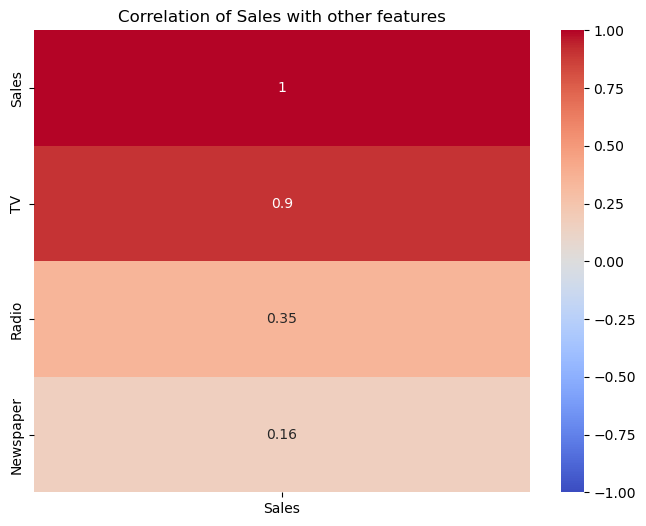

In [7]:


# Вычисляем матрицу корреляций
correlation_matrix = data.corr()

# Извлекаем корреляции только с целевым признаком 'Sales'
sales_correlation = correlation_matrix[['Sales']].sort_values(by='Sales', ascending=False)

# Визуализируем корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(sales_correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation of Sales with other features")
plt.show()


### 6. Построить и обучить модель линейной регрессии для одной самой сильной независимой переменной (смотреть на коэффициент корреляции). Вывести коэффициенты модели. Построить диаграмму рассеяния для продаж и значений независимой переменной. По уравнению регрессии на диаграмме нарисовать линию, апроксимирующую эти точки. 

Коэффициенты корреляции:
                  TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000
Самая сильная независимая переменная: TV
Коэффициент наклона (slope): 0.05548294393146318
Свободный член (intercept): 7.007108428241851


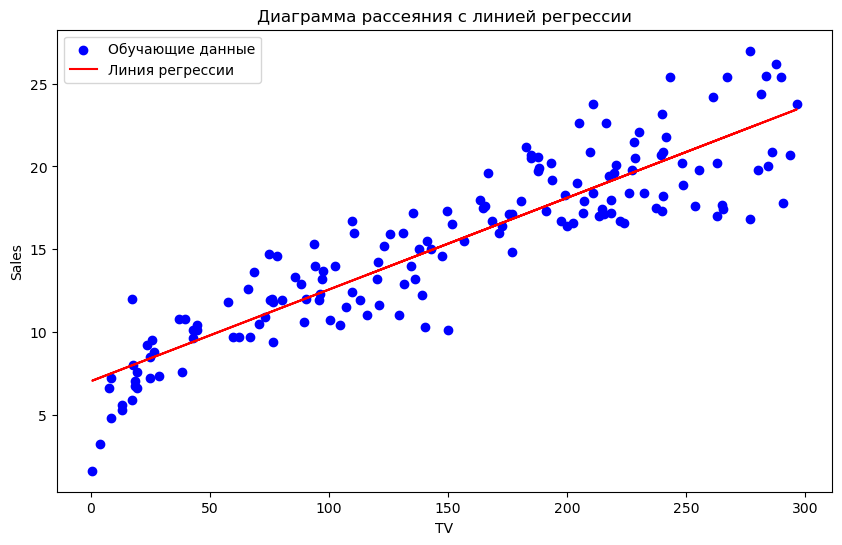

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Вычисление коэффициентов корреляции
correlations = data.corr()
print("Коэффициенты корреляции:\n", correlations)

# Выбираем переменную с наибольшей корреляцией с 'Sales'
most_correlated_feature = correlations['Sales'].drop('Sales').idxmax()
print(f'Самая сильная независимая переменная: {most_correlated_feature}')

# Разделяем данные на обучающую и тестовую выборки
X = data[[most_correlated_feature]]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Вывод коэффициентов модели
print(f'Коэффициент наклона (slope): {model.coef_[0]}')
print(f'Свободный член (intercept): {model.intercept_}')

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Обучающие данные')
plt.plot(X_train, model.predict(X_train), color='red', label='Линия регрессии')
plt.xlabel(most_correlated_feature)
plt.ylabel('Sales')
plt.title('Диаграмма рассеяния с линией регрессии')
plt.legend()
plt.show()


### 7. Осуществить предсказания модели на тестовой выборке.

In [9]:
# your code here
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вывод первых 10 предсказанных значений для тестовой выборки
print("Предсказанные значения продаж на тестовой выборке (первые 10):", y_pred[:10])

# Вы также можете оценить качество модели, например, с использованием метрики R^2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'Коэффициент детерминации R^2 на тестовой выборке: {r2}')


Предсказанные значения продаж на тестовой выборке (первые 10): [16.06747317 17.84847567 23.25806271  7.65625887 19.23000098 11.17387752
 19.03581067  9.78125562 19.34651516 16.72217191]
Коэффициент детерминации R^2 на тестовой выборке: 0.802561303423698


### 8. Рассчитать значения метрик для модели (МАЕ, MSE, RMSE). Какую метрику лучше выбрать?

In [10]:
# your code here
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Расчёт метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Средняя абсолютная ошибка (MAE): {mae}')
print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse}')


Средняя абсолютная ошибка (MAE): 1.9502948931650088
Среднеквадратичная ошибка (MSE): 6.101072906773964
Корень из среднеквадратичной ошибки (RMSE): 2.470035001123256


### 9. Построить и обучить модель множественной линейной регрессии (включить в модель все признаки). Вывести коэффициенты модели. Осуществить прогноз модели на тестовых данных.

In [13]:
# your code here
# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('Sales', axis=1)  # Все признаки, кроме 'Sales'
y = data['Sales']

# Разделение данных на обучающую и тестовую выборки
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели множественной линейной регрессии
model = LinearRegression()
model.fit(X_train_pr, y_train_pr)

# Вывод коэффициентов модели
print("Коэффициенты модели:")
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')
print(f'Свободный член (intercept): {model.intercept_}')

# Прогнозирование на тестовых данных
y_pred_pr = model.predict(X_test_pr)

r2 = r2_score(y_test, y_pred)
print(f'Коэффициент детерминации R^2 на тестовой выборке: {r2}')


Коэффициенты модели:
TV: 0.054509270837219764
Radio: 0.10094536239295575
Newspaper: 0.004336646822034021
Свободный член (intercept): 4.714126402214134
Коэффициент детерминации R^2 на тестовой выборке: 0.802561303423698


### 10.  Рассчитать значения метрик для модели (МАЕ, MSE, RMSE). Сравнить значения метрик со значениями метрик для модели простой линейной регрессии (одна независимая переменная). Сделать выводы.

In [14]:

# Расчёт метрик для 1 модели
mae_simple = mean_absolute_error(y_test, y_pred)
mse_simple = mean_squared_error(y_test, y_pred)
rmse_simple = np.sqrt(mse_simple)

print(f'1 модель (Простая линейная регрессия):')
print(f'Средняя абсолютная ошибка (MAE): {mae_simple}')
print(f'Среднеквадратичная ошибка (MSE): {mse_simple}')
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse_simple}')

# Расчёт метрик для 2 модели
mae_multiple = mean_absolute_error(y_test_pr, y_pred_pr)
mse_multiple = mean_squared_error(y_test_pr, y_pred_pr)
rmse_multiple = np.sqrt(mse_multiple)

print(f'\n2 модель (Множественная линейная регрессия):')
print(f'Средняя абсолютная ошибка (MAE): {mae_multiple}')
print(f'Среднеквадратичная ошибка (MSE): {mse_multiple}')
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse_multiple}')



1 модель (Простая линейная регрессия):
Средняя абсолютная ошибка (MAE): 1.9502948931650088
Среднеквадратичная ошибка (MSE): 6.101072906773964
Корень из среднеквадратичной ошибки (RMSE): 2.470035001123256

2 модель (Множественная линейная регрессия):
Средняя абсолютная ошибка (MAE): 1.2748262109549344
Среднеквадратичная ошибка (MSE): 2.9077569102710923
Корень из среднеквадратичной ошибки (RMSE): 1.7052146229349232
